In [108]:
#Importing the Essential libraries and their Functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [110]:
from sklearn.naive_bayes import GaussianNB

In [114]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [116]:
Data_Path = pd.read_csv("C:/Users/HP/Desktop/LinkedIn/Apziva/Projects/Happy Customers Project (Project 1)/ACME-HappinessSurvey2020.csv")

print(Data_Path)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


#EDA

In [117]:
Data_Path.head(10)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


In [118]:
Data_Path.tail(10)

,Y,X1,X2,X3,X4,X5,X6
116,1,3,4,4,5,1,3
117,1,5,1,5,5,5,5
118,1,4,3,3,4,4,4
119,1,5,5,1,1,5,1
120,0,4,4,4,4,1,3
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5
125,0,5,3,2,5,5,5


In [119]:
Data_Path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [120]:
Data_Path.describe

<bound method NDFrame.describe of      Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]>

In [133]:
#Data_Splitting & Data_Labeling

DataLabeling = Data_Path.values
x = DataLabeling[:, 1:7] 
y = Data_Path['Y']

trainX, trainY, testX, testY = train_test_split(x, y, test_size = 0.2, random_state = 6)

In [134]:
#Data_Shape

trainX.shape

(100, 6)

In [135]:
trainY.shape

(26, 6)

In [136]:
testX.shape

(100,)

In [137]:
testY.shape

(26,)

#Correlation Cofficient

In [138]:
np.corrcoef(trainX, trainY)

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[ 1.        ,  0.        ,  0.54232614, ..., -0.1       ,
         0.4       ,  0.7592566 ],
       [ 0.        ,  1.        ,  0.59408853, ...,  0.54772256,
         0.27386128,  0.        ],
       [ 0.54232614,  0.59408853,  1.        , ...,  0.43386092,
         0.86772183,  0.76470588],
       ...,
       [-0.1       ,  0.54772256,  0.43386092, ...,  1.        ,
         0.5       , -0.10846523],
       [ 0.4       ,  0.27386128,  0.86772183, ...,  0.5       ,
         1.        ,  0.7592566 ],
       [ 0.7592566 ,  0.        ,  0.76470588, ..., -0.10846523,
         0.7592566 ,  1.        ]])

In [139]:
Data_Path.['trainX'].corr(Data_Path(['trainY']))

SyntaxError: invalid syntax (<ipython-input-139-999952792cca>, line 1)

In [140]:
Data_Path.corr()

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


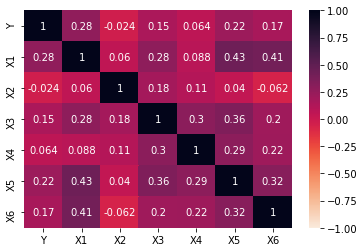

In [141]:
sns.heatmap(Data_Path.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

# Naive Bayes Algorithm

In [146]:
#Data_Splitting & Data_Labeling

DataLabeling = Data_Path.values
x = DataLabeling[:, 1:7] 
y = Data_Path['Y']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state = 6)

In [147]:
#Building the Naive Bayes Algorithm

NaiveBayes_Model = GaussianNB()

NaiveBayes_Model.fit(trainX, trainY)

NaiveBayes_prediction = NaiveBayes_Model.predict(testX)

In [148]:
#Calculating the results for Training the Algorithm in aspects of Accuracy, F1 Score, Precision Score, Recall Score


print("Accuracy", accuracy_score(testY, NaiveBayes_prediction))
print("F1 Score", f1_score(testY, NaiveBayes_prediction))
print("Precision Score", precision_score(testY, NaiveBayes_prediction))
print("recall Score", recall_score(testY, NaiveBayes_prediction))

Accuracy 0.5384615384615384
F1 Score 0.6470588235294117
Precision Score 0.7333333333333333
recall Score 0.5789473684210527


In [149]:
confusion_matrix(testY, NaiveBayes_prediction)

array([[ 3,  4],
       [ 8, 11]], dtype=int64)

<AxesSubplot:>

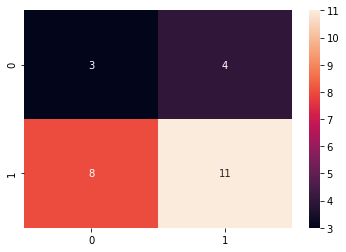

In [150]:
#Visualizing the Confusion Matrix

sns.heatmap(confusion_matrix(testY, NaiveBayes_prediction),annot=True)

# SVM Algorithm

In [151]:
#Building the SVM Algorithm

classifer = svm.SVC()

In [152]:
#Training the SVM Algorithm

classifer.fit(trainX, trainY)

SVC()

In [164]:
SVM_prediction = classifer.predict(testX)

In [165]:
#Calculating the results for Training the Algorithm in aspects of Accuracy, F1 Score, Precision Score, Recall Score

print("Accuracy", accuracy_score(testY, SVM_prediction))
print("F1 Score", f1_score(testY, SVM_prediction))
print("precision Score", precision_score(testY, SVM_prediction))
print("recall Score", recall_score(testY, SVM_prediction))

Accuracy 0.6153846153846154
F1 Score 0.7222222222222222
precision Score 0.7647058823529411
recall Score 0.6842105263157895


In [166]:
confusion_matrix(testY, SVM_prediction)

array([[ 3,  4],
       [ 6, 13]], dtype=int64)

<AxesSubplot:>

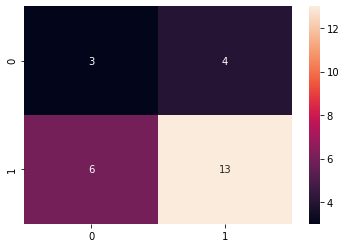

In [167]:
#Visualizing the Confusion Matrix

sns.heatmap(confusion_matrix(testY, SVM_prediction),annot=True)

In [168]:
svm_params = {
    'C':[1],
    'kernel':['rbf'],
    'gamma':[0.01]
}

In [169]:
#Applying Grid-Search Technique

classifer = GridSearchCV(svm.SVC(), svm_params, return_train_score=False, scoring='accuracy')

In [170]:
classifer.fit(trainX, trainY)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1], 'gamma': [0.01], 'kernel': ['rbf']},
             scoring='accuracy')

In [171]:
svm_model = classifer.best_estimator_

In [172]:
svm_model.predict(testX)

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1], dtype=int64)

In [174]:
classifer.best_score_

0.55